In [3]:
#!/usr/bin/env python
from __future__ import print_function
import numpy as np
import time
import random
import math
import imageio
from matplotlib.backends.backend_pdf import PdfPages

import matplotlib.pyplot as plt
import os
import shutil
import h5py
import imageio
import networkx as nx
from CuriousSamplePlanner.planning_pybullet.pybullet_tools.kuka_primitives import BodyPose, BodyConf, Command, get_grasp_gen, \
    get_ik_fn, get_free_motion_gen, get_holding_motion_gen
from CuriousSamplePlanner.planning_pybullet.pybullet_tools.utils import WorldSaver, enable_gravity, connect, dump_world, set_pose, \
    Pose, Point, Euler, set_default_camera, stable_z, \
    BLOCK_URDF, load_model, wait_for_user, disconnect, DRAKE_IIWA_URDF, user_input, update_state, disable_real_time,inverse_kinematics,end_effector_from_body,approach_from_grasp 

from CuriousSamplePlanner.planning_pybullet.pybullet_tools.kuka_primitives import BodyPath, Attach, Detach
import pickle
import torch
from torchvision import models, transforms
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import collections
from motion_planners.discrete import astar
import sys

from CuriousSamplePlanner.trainers.plan_graph import PlanGraph, GraphNode


/home/arc11/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
def plot_graph(exp_id ="fs4"):
    plan_graph_path = "/mnt/fs0/arc11_2/solution_data/"+exp_id+"/found_graph.pkl"
    plan_graph_filehandler = open(plan_graph_path, 'rb')
    plan_graph = pickle.load(plan_graph_filehandler)

    G=nx.Graph()
    colormap = []
    num_run = 12
    plots_height = 1
    plots_width = num_run
    
    fig, axs = plt.subplots(plots_height, plots_width, figsize=(35, 3))

    for key, values in plan_graph.plan_graph.items():
        G.add_node(key)

    for key, values in plan_graph.plan_graph.items():
        for val in values:
            G.add_edge(key, val)

    my_pos = nx.spring_layout(G, seed=19)



    for run_index in range(0, num_run):
        edges = []
        nodes = []
        omit_nodes = []
        omit_edges = []
        colormap = []
        for key, values in plan_graph.plan_graph.items():
            if(key.run_index<=run_index):
                nodes.append(key)
            else:
                omit_nodes.append(key)

        for key, values in plan_graph.plan_graph.items():
            for val in values:
                if(key.run_index<=run_index and val.run_index<=run_index):
                    edges.append((key, val))
                else:
                    omit_edges.append((key,val))

        for node in G:
            if(node.run_index<=run_index):
                max_z_pos = max([node.config[2], node.config[8], node.config[14], node.config[20], node.config[26]])
                if(max_z_pos < 0.06):
                    colormap.append("#0000FF")
                elif(max_z_pos < 0.16):
                    colormap.append("#00FF00")
                elif(max_z_pos < 0.26):
                    colormap.append("#FFA500")
                elif(max_z_pos < 0.36):
                    colormap.append("#FF0000")
                elif(max_z_pos < 0.46):
                    colormap.append("#FF00FF")


        H = nx.restricted_view(G, omit_nodes, omit_edges)
        nx.draw(H, pos=my_pos,  node_color = colormap, node_size=20, ax=axs[run_index%plots_width])
    #     axs[run_index].show()
    #     plt.figure()

    pp = PdfPages(str(exp_id)+'.pdf')
    pp.savefig(fig)
    plt.show()

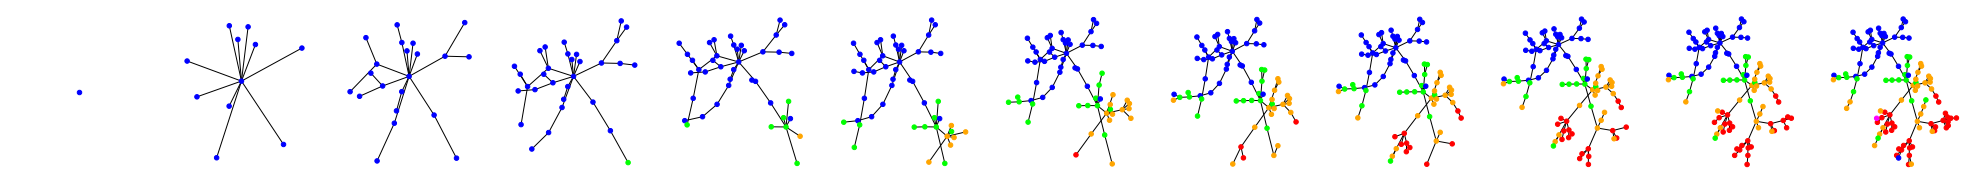

In [9]:
plot_graph()

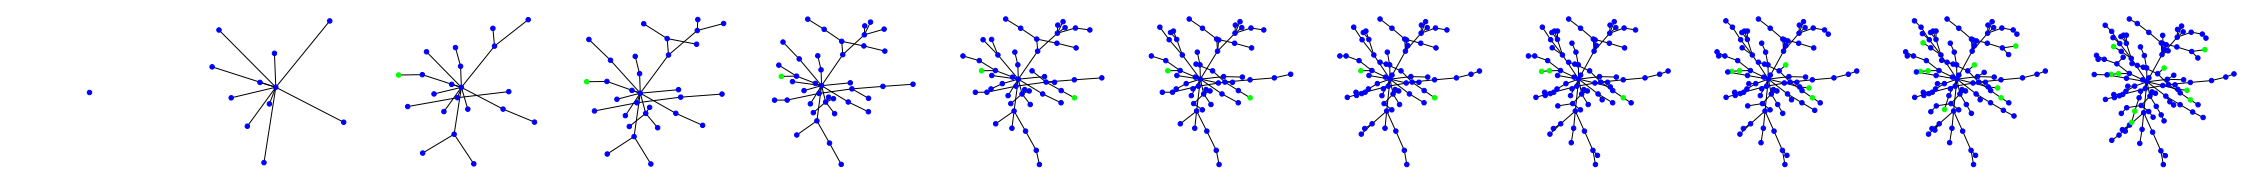

In [177]:
plot_graph(exp_id="random2")

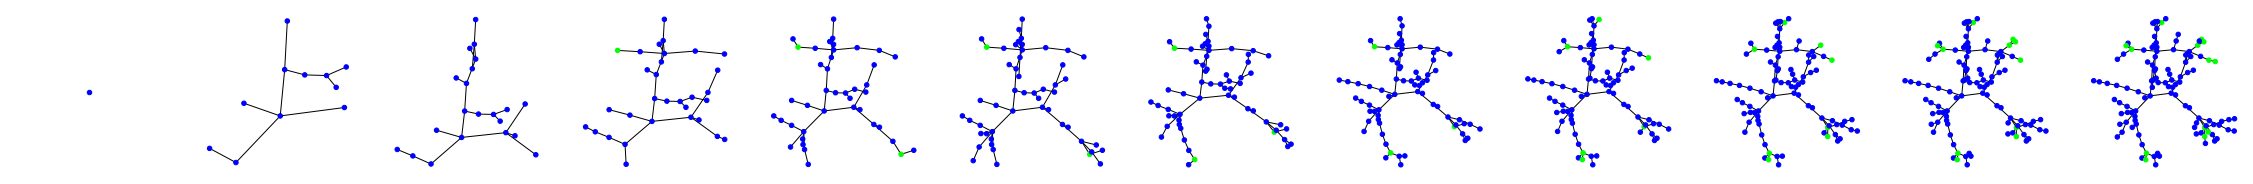

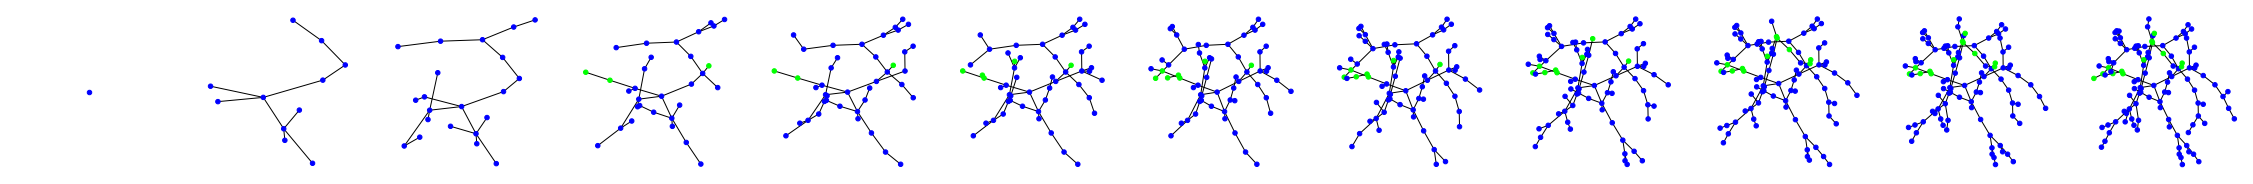

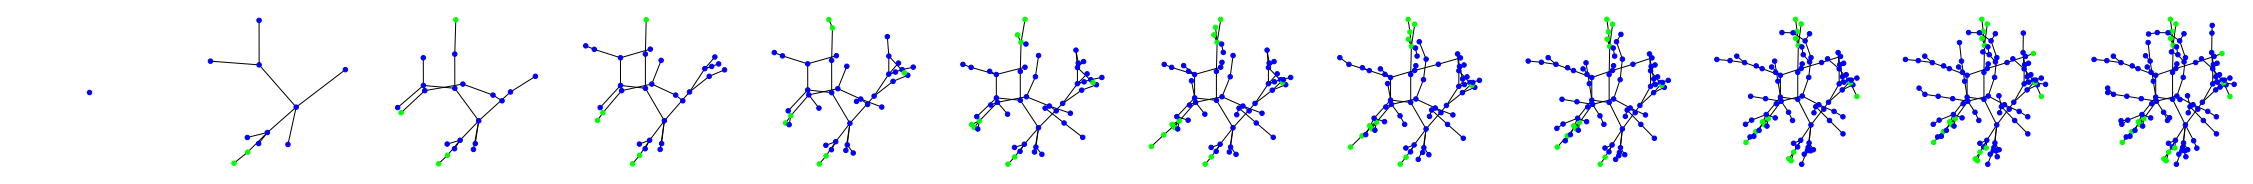

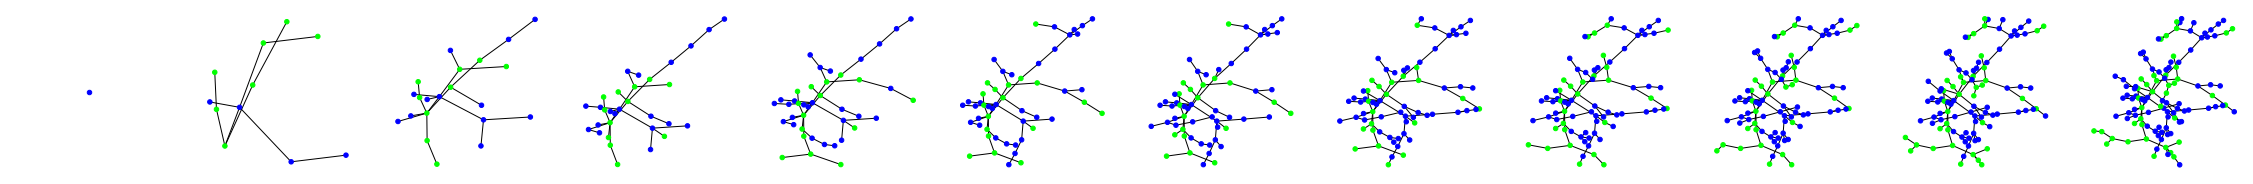

[None, None, None, None]

In [10]:
[plot_graph(exp_id="rrt"+str(i)) for i in range(1, 5)]
